In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Projeto 2 de Algebra Linear Numérica
Considere um conjunto de pontos igualmente espaçados $t_i = \frac{i}{m}$ para $i = 0, . . . , m$

**a. Regressão linear. Formule o problema de encontrar $\alpha$ e $\beta$ tais que $f (t) = \alpha + \beta t$ seja a melhor aproximação em mínimos quadrados para os pontos $(t_i , b_i )$. Ou seja, dê, em função de $t_i$ , $b_i$ e $m$, o sistema de equações que devemos resolver para encontrar $\alpha$ e $\beta$.**

Aqui, temos uma simples regressão linear! Temos os vetores 
$$
t = \begin{bmatrix} t_1 \\ t_2 \\ t_3 \\ \vdots \\ t_m \end{bmatrix}, b = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_m \end{bmatrix}
$$
Para cada entrada desses vetores, temos uma equação $b_j = \alpha + \beta t_j$, podemos reescrever como o sistema
$$
\begin{bmatrix} 1 & t_1 \\ 1 & t_2 \\ 1 & t_3 \\ \vdots \\ 1 & t_m \end{bmatrix}
\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_m \end{bmatrix}
$$
Queremos que a soma quadrada dos erros seja a menor possível, então, podemos escrever a função de erro:
$$
E(\alpha, \beta) = \frac{1}{2} \sum_{i = 0}^m(b_i - (\alpha + \beta t_i))^2
$$
Queremos então minimizar essa função, podemos escrever seu gradiente e igualá-lo a $0$ correto?
$$
\frac{\partial E}{\partial \alpha}(\alpha, \beta) = \frac{1}{2} 2 \sum_{i = 0}^m{b_i - \alpha - \beta t_i} = \sum_{i = 0}^m{b_i - \alpha - \beta t_i}

\\

\frac{\partial E}{\partial \beta}(\alpha, \beta) = \frac{1}{2} 2 \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i = \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i

\\

\nabla E(\alpha, \beta) = \sum_{i = 0}^m \begin{bmatrix}
    b_i - \alpha - \beta t_i \\
    (b_i - \alpha - \beta t_i)t_i
\end{bmatrix}
$$

Se igualarmos a 0 e reescrevermos deixando o somatório dentro e separando em vários somatórios temos:
$$
\sum_{i = 0}^m \begin{bmatrix}
    b_i - \alpha - \beta t_i \\
    (b_i - \alpha - \beta t_i)t_i
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i) \\
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i = 0}^m b_i - \sum_{i = 0}^m\alpha - \beta \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i
\end{bmatrix} = 0
$$

Ou seja, temos dois sistemas de equações para serem resolvidos:
$$
\begin{cases} 
  \sum_{i = 0}^m b_i = (m+1)\alpha + \beta \sum_{i = 0}^mt_i \\
  \sum_{i = 0}^mt_ib_i = \alpha\sum_{i = 0}^mt_i + \beta\sum_{i = 0}^m t_i^2
\end{cases}
$$

Ou, reescrevendo com matrizes:
$$
\begin{bmatrix}
    \sum_{i = 0}^m b_i \\
    \sum_{i = 0}^mt_ib_i
\end{bmatrix} =

\begin{bmatrix}
    m+1 & \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^mt_i & \sum_{i = 0}^m t_i^2
\end{bmatrix}

\begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix}
$$

Ou seja, criamos um novo sistema $A x = c$

Vamos fazer um exemplo usando python e mostrando visualmente e resolvendo da forma que mostramos

In [3]:
np.random.seed(0)  # Definindo uma seed

# Gerando pontos aleatórios
m = 20  # Decidindo quantos pontos eu terei
t = np.array([i/m for i in range(m+1)]).reshape((-1, 1))  # Gerando t
b = np.random.random_sample((t.shape[0], 1))  # Gerando b

Agora que defini as $b$, $t$ e $m$, vamos ver como fica plotando os pontos no gráfico!

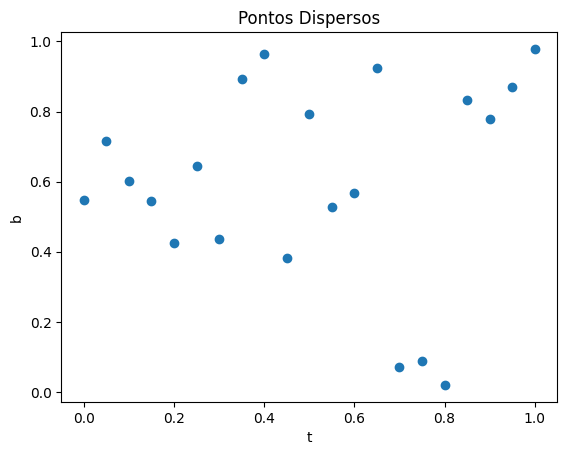

In [4]:
plt.scatter(t, b)
plt.title("Pontos Dispersos")
plt.ylabel('b')
plt.xlabel('t')
plt.show()

Vamos agora fazer o algoritmo para encontrar a reta $f(x) = \alpha + \beta t$ utilizando
$$
\begin{bmatrix}
    \sum_{i = 0}^m b_i \\
    \sum_{i = 0}^mt_ib_i
\end{bmatrix} =

\begin{bmatrix}
    m+1 & \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^mt_i & \sum_{i = 0}^m t_i^2
\end{bmatrix}

\begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix}
$$

In [5]:
# Calculando
c = np.array([
    b.sum(),
    (t.T @ b)[0,0]
]).reshape(-1, 1)

A = np.array([
    m + 1, t.sum(),
    t.sum(), np.linalg.norm(t)**2
]).reshape(2, 2)


coefficients = np.linalg.solve(A, c)
coefficients

array([[0.5759977 ],
       [0.04892982]])

Encontramos os nossos coeficientes! Vamos vizualisar como isso fica no gráfico!

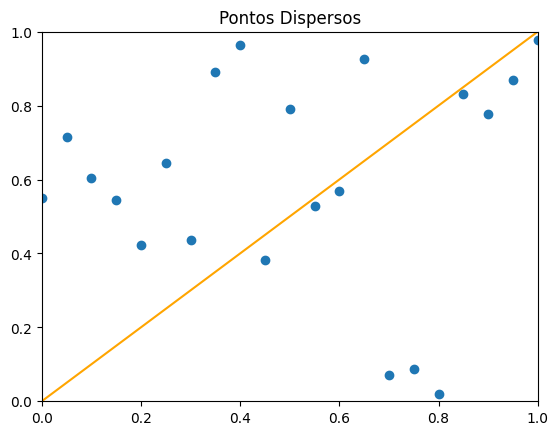

In [6]:
x = np.linspace(-100, 100, 1000) * coefficients[1] + coefficients[0]
y = np.linspace(-100, 100, 1000) * coefficients[1] + coefficients[0]

plt.plot(x,y, color="orange", label="Regressão Linear")
plt.scatter(t, b)
plt.title("Pontos Dispersos")
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.show()

**b. Calcule (numericamente), para vários valores de $m$, o condicionamento da matriz $A$
correspondente. O que parece acontecer?**

Show, apenas lembrando a definição de condicionamento de uma matriz
$$
\kappa(A) = \|A\|\|A^{-1}\|
$$

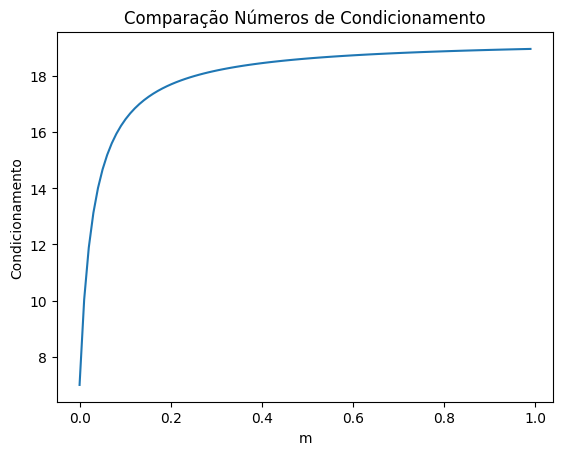

In [12]:
np.random.seed(0)
# Gerando pontos aleatórios
m = 100  # Decidindo quantos pontos eu terei

conditions = []


for j in range(m):
    if j == 0:
        continue

    t = np.array([[1, i/(j)] for i in range(j+1)]).reshape((-1, 2))  # Gerando t
    b = np.random.random_sample((t.shape[0], 1))  # Gerando b

    linear_eq_matrix = t.T @ t

    conditions.append(
        np.linalg.norm(linear_eq_matrix) * np.linalg.norm(np.linalg.solve(linear_eq_matrix, np.eye(2)))
    )


plt.title("Comparação Números de Condicionamento")
plt.xlabel("m")
plt.ylabel("Condicionamento")

plt.plot(t[:-1, 1], conditions)

plt.show()

Podemos ver o (visualmente) aparente crescimento logaritmico da norma conforme aumentamos a quantidade de pontos